# Extra resources
- XGBoost: A Scalable Tree Boosting System. Tianqui Chen and Carlos Guestrin;
- A Unified Approach to Interpreting Model Predictions. Scott M. et al;
- Toward safer highways, application of XGBoost and SHAP for real-time accident detection and feature analysis. Amir et al.

# Case of study
- Understanding house price drivers
- Step by step
  1. Install SHAP and import libraries
  2. Transform string variables
  3. Isolate X and Y, and generate XGBoost matrix
  4. Set parameters and run XGBoost
  5. Local interpretability
  6. Dependency plots
  7. Global interpretability

# Imports

In [9]:
# !pip install pydataset
# !pip install shap

In [10]:
import shap
import pandas as pd
import xgboost as xgb

from pydataset import data

# Load data

In [11]:
data = data('Housing')
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


# Data prep

transforming string variables

In [12]:
dataset = pd.get_dummies(data, drop_first=True)
dataset.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
1,42000.0,5850,3,1,2,1,1,0,1,0,0,0
2,38500.0,4000,2,1,1,0,1,0,0,0,0,0
3,49500.0,3060,3,1,1,0,1,0,0,0,0,0
4,60500.0,6650,3,1,2,0,1,1,0,0,0,0
5,61000.0,6360,2,1,1,0,1,0,0,0,0,0


isolate X and y

In [13]:
y = dataset.price
X = dataset.iloc[:,1:]

Create XGBoost Matrix

In [14]:
Train = xgb.DMatrix(X, label = y)

# XGBoost

In [15]:
parameters = {'learning_rate': 0.3,
              'max_depth': 6,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight': 1,
              'gamma': 0,
              'random_state':1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

Running XGBoost

In [16]:
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 15)

# SHAP

In [17]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

## Local interpretability

In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.loc[1])

In [19]:
shap_values

array([[  834.57477,  1862.9341 , -4179.776  , ...,  -687.5097 ,
        -2901.6624 , -1700.4194 ],
       [-5592.5396 , -3261.5676 , -3372.9644 , ...,  -432.99753,
        -2653.6006 , -1568.1526 ],
       [-9686.878  ,   970.2639 , -3593.866  , ...,  -615.54443,
        -2282.5151 , -1582.8888 ],
       ...,
       [15376.897  ,  1064.8717 ,  9799.6045 , ...,  -161.0495 ,
         9352.256  , -2957.2551 ],
       [15606.998  ,  1018.6325 , 11274.758  , ...,  -191.3369 ,
         9492.611  , -2779.7979 ],
       [15006.012  ,  1454.5299 , -6310.507  , ...,  -304.85178,
         7299.6855 , -2556.4954 ]], dtype=float32)

In [20]:
X.head()

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
1,5850,3,1,2,1,1,0,1,0,0,0
2,4000,2,1,1,0,1,0,0,0,0,0
3,3060,3,1,1,0,1,0,0,0,0,0
4,6650,3,1,2,0,1,1,0,0,0,0
5,6360,2,1,1,0,1,0,0,0,0,0


Local interpretability - plot all

In [21]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

## Dependence plots

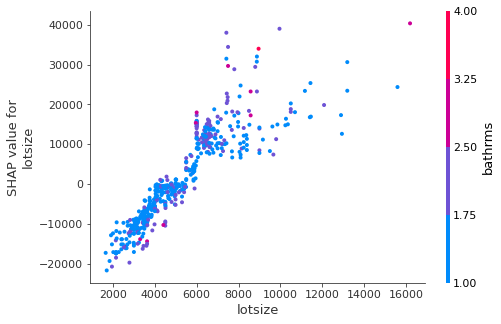

In [22]:
shap.dependence_plot("lotsize", shap_values, X)

## Global Interpretability

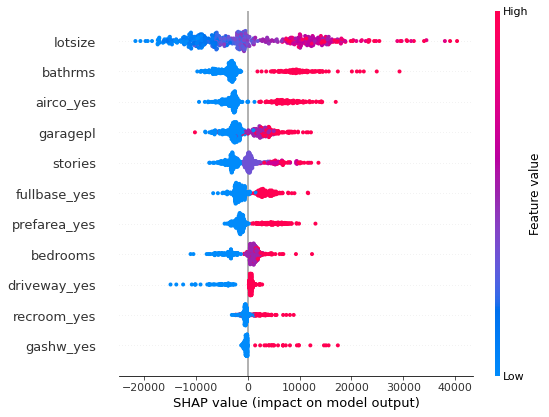

In [23]:
shap.summary_plot(shap_values, X)